<a href="https://colab.research.google.com/github/IbukunGracey/PyTorch-Basics/blob/main/03_Neural_Network_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network with Pytorch

Data can be almost anything

1. Excel spreadsheet - Tabular data in numerical format or mixed
2. Images of any kind
3. Videos (Youtube has lots of Data)
4. Audio like- songs or Podcasts
5. Text data - News articles, Pdf Documents, Tweets, posts etc'
6. DNA
7. Geospatial Data (location data) etc.

Machine learning/ DL is in two parts:
1. Get the data into numerical representation
2. Build a model to learn patterns in the Numerical Representation

We will be using the Iris dataset from https://archive.ics.uci.edu/dataset/53/iris to build a simple neural network model.

#### Some Definitions

Neural networks (NN), or artificial neural networks (ANN), are loosely connected models with flexible structures and large parameter space.

Thanks to the inspiration from the biological mechanisms of brain function, neural networks can recognize patterns in data and solve complex tasks related to language understanding and computer vision, among other things.

Therefore, neural networks are composed of layers, of which we can be classified as three types:

*  **Input layer:** This is where the data is directed, which the network will process.

*  **Hidden layers:**These are located between the input and output layers. They are called “hidden” because their inputs and outputs are not directly visible. In these layers, the model gains the ability to recognize patterns in the data, updating its parameters (weights) during training based on the input data.

*  **Output layer:** This layer returns the final result of the network’s operation. It could be, for example, recognized word categories in text or objects detected in an image.


**Activation Functions**

An activation function is a mathematical function applied to the output of a neuron in a neural network. It determines whether a neuron is activated or not, essentially deciding whether the neuron's input is important for making predictions. This transformation introduces non-linearity into the model, enabling it to learn and represent complex patterns in the data

**Common Activation Functions:**
1. Sigmoid:
Squeezes input values into the range of 0 to 1, often used in binary classification.

2. Tanh (Hyperbolic Tangent):
Squeezes input values into the range of -1 to 1, similar to sigmoid but zero-centered.

3. ReLU (Rectified Linear Unit):
Outputs the input if it's positive and 0 otherwise, computationally efficient and effective for many tasks.

4. Softmax:
Normalizes output values to represent probabilities, commonly used in multi-class classification.

5. Leaky ReLU:
Similar to ReLU, but with a small slope for negative inputs, helping to mitigate the "dying ReLU" problem.

**Why are activation functions important?**

**Learning Complex Patterns:**
They enable neural networks to learn and represent complex patterns in data, which would not be possible with only linear transformations.

**Preventing Vanishing Gradients:**
Some activation functions, like ReLU, can help mitigate the vanishing gradient problem, where gradients become very small during backpropagation, hindering learning.

**Information Flow Control:**
They control the flow of information through the network, allowing the network to learn what is relevant and what is not.


Data Description:

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

Steps:

1. Create a neural network model
2. Turn on the model/ Instantiate the model
3. Load your data/ Do some data preparation
4. Split the data
5. Train your model
6. Validate the model using the test data
7. Fine tune your model
8. Make Predictions
9. Save your model


In [39]:
### IMPORT STATEMENTS
import torch                  # import the torch module
import torch.nn as nn         # import the neural hetwork library in pytorch
import torch.nn.functional as F  # this helps to move data forward in our function


### 1. Create the neural network model
Using a Model Class that inherits the newtork

In [40]:
class Model(nn.Module):
  # Define the Input layers (4 features for the flower) -->
  # Hidden layer 1 with n neurons -->
  # Hidden layer 2 with m neurons -->
  # output with 3 classes of iris flower

  #initialize the model Self
  def __init__(self, input_features=4, h1=8, h2=9, output_features=3):
    super().__init__()  #instantiate our nn.Module

    #define the layers
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  #Create a forward network function: function to move everything forward
  # Relu- if output less than 0, make it 0, if output more than 0 use the output
  def forward(self, x):
    x = F.relu(self.fc1(x)) #start with layer 1 and apply and activation function
    x = F.relu(self.fc2(x)) #move to layer 2 and apply an activation function
    x = self.out(x)         #move to output layer without an activation function
    return x

In [41]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of our model - Turn the model ON
model = Model()

###2.  Load Data and Train our Model

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [43]:
#load the data
data = 'https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(data)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [44]:
#Data manipulation
#change last column to integers
df['variety'] = df['variety'].map({'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0})
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [45]:
# df.head()

#### Split the data

In [46]:
# Define the features and label
x = df.drop('variety', axis =1)
y = df['variety']


In [47]:
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
y.head()

,variety
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [49]:
#convert these to numpy arrays
x= x.values
y= y.values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
type(x)

numpy.ndarray

In [51]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=32)


In [53]:
# Convert X-inputs to float tensors
# x_train = torch.tensor(x_train, dtype=torch.double)
x_train = torch.FloatTensor(x_train)
x_test =torch.FloatTensor(x_test)

#convert y-label to long tensors
# y_train = torch.tensor(y_train, dtype=torch.double)
y_train = torch.LongTensor(y_train)
y_test =torch.LongTensor(y_test)

In [54]:
y_train

tensor([1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2,
        1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0,
        0, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2,
        0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1,
        2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0])

### Criterion  and Optimizer

In [55]:
# Set the criterion of model to measure the error,
# how far off the prediction are from the data

criterion = nn.CrossEntropyLoss()

# Choose an Optimizer (Adam), learning rate
# (if error doesn't go down after a bunch of iterations (epoch), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr =0.01) #the lower the lr the more the time to train

In [56]:
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [57]:
y_pred = model.forward(x_train)
loss = criterion(y_pred, y_train)
optimizer.zero_grad() # reset grads
loss.backward()
optimizer.step()

In [58]:
# Train the model
#Epoch? (if 1, it implies the number of time the model is trained is once)

epoch =100
losses = []   #this list is to store the losses in each epoch

for i in range(epoch):
  # Go forward and get prediction
  y_pred = model.forward(x_train) #get predicted result

  #Measure the loss/error, it will be high at first- How far predictions from data
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation and feed it back
  #through the network to fine tune the weight
  optimizer.zero_grad() # reset grads
  loss.backward()
  optimizer.step() # update weights


Epoch: 0 and loss: 1.1307851076126099
Epoch: 10 and loss: 0.941157341003418
Epoch: 20 and loss: 0.7851296067237854
Epoch: 30 and loss: 0.6118980646133423
Epoch: 40 and loss: 0.42122682929039
Epoch: 50 and loss: 0.2782890498638153
Epoch: 60 and loss: 0.16907861828804016
Epoch: 70 and loss: 0.1121949627995491
Epoch: 80 and loss: 0.0878026932477951
Epoch: 90 and loss: 0.07673252373933792


Text(0.5, 0, 'Epoch')

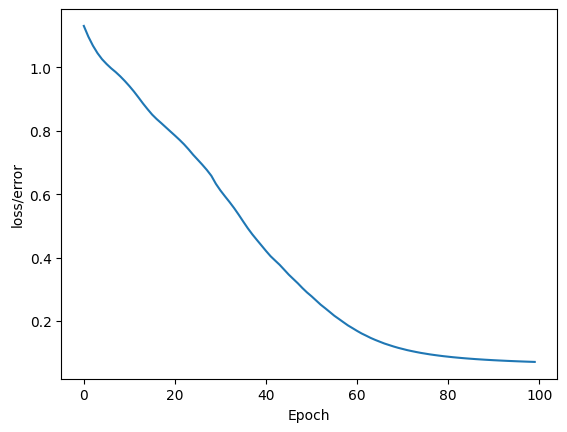

In [59]:
#Visualize the result
plt.plot(range(epoch), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')


### Model Validation on Test Data

In [60]:
#Evaluate Model on Test Data set
with torch.no_grad():   #This turns off back propagation
  #Evaluate the data on the 20% of data
  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be
  loss = criterion(y_eval, y_test) # Find the test loss or error

In [61]:
loss   # the test loss is close to the train loss, we have a great model

tensor(0.0544)

#### Track the individual test data

In [ ]:
 y_sam = model.forward(x_test[0])
 y_sam.argmax()


tensor(1)

In [62]:
len(y_test)

30

In [67]:
#'Setosa': 0.0, 'Versicolor': 1.0, 'Virginica': 2.0d
ata1= x_test[0]
y_val = model.forward(data1)
y_val.argmax().item()

1

In [ ]:
#Let's track the total correct data

correct = 0
with torch.no_grad():    #turn off back propagation
  for i, data in enumerate(x_test):
    y_val = model.forward(data)   # pass test data through the model

    #will tell us what type of flower class our network think it is
    # argmax is a function that finds the index of the maximum value within an array or along a specified axis.
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # check number of correct labels
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1.) tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2.) tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3.) tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
4.) tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5.) tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6.) tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7.) tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8.) tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9.) tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10.) tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11.) tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12.) tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13.) tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14.) tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15.) tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16.) tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17.) tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18.) tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19.) tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20.) tensor([  7.7757,   1.3740, -11.8864]) 	 0 	 0
21.) tensor

In [ ]:
# OR to print labels, do this:

#Let's track the total correct data

correct = 0
with torch.no_grad():    #turn off back propagation
  for i, data in enumerate(x_test):
    y_val = model.forward(data)   # pass test data through the model

    if y_test[i] == 0:
      x= 'Setosa'
    elif y_test[i] == 1:
      x ='Versicolor'
    else:
      x = 'Virginica'

    #will tell us what type of flower class our network think it is
    # argmax is a function that finds the index of the maximum value within an array or along a specified axis.
    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}')

    # check number of correct labels
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1.) tensor([-3.3646,  3.9392,  0.3720]) 	 Versicolor 	 1
2.) tensor([  7.5572,   1.1015, -11.3347]) 	 Setosa 	 0
3.) tensor([  6.5957,   1.5027, -10.4091]) 	 Setosa 	 0
4.) tensor([-3.3331,  4.2594,  0.0623]) 	 Versicolor 	 1
5.) tensor([-7.3782,  2.8087,  5.1605]) 	 Virginica 	 2
6.) tensor([-7.3760,  3.9013,  4.2826]) 	 Virginica 	 2
7.) tensor([  6.1971,   1.6470, -10.0047]) 	 Setosa 	 0
8.) tensor([  6.6383,   1.4348, -10.4031]) 	 Setosa 	 0
9.) tensor([-2.6753,  4.3091, -0.6392]) 	 Versicolor 	 1
10.) tensor([  7.1875,   1.3812, -11.0965]) 	 Setosa 	 0
11.) tensor([-3.8318,  4.4027,  0.5246]) 	 Versicolor 	 1
12.) tensor([-8.6807,  1.9994,  6.8923]) 	 Virginica 	 2
13.) tensor([-2.0678,  3.8200, -0.7571]) 	 Versicolor 	 1
14.) tensor([-1.0768,  4.3741, -2.2838]) 	 Versicolor 	 1
15.) tensor([-7.4965,  2.6207,  5.3287]) 	 Virginica 	 2
16.) tensor([-8.6136,  1.5508,  7.1186]) 	 Virginica 	 2
17.) tensor([-3.7761,  3.6462,  0.9487]) 	 Versicolor 	 1
18.) tensor([-6.7608,  2.7754,  4

### Feed New Data into the Neural Network and Make Prediction

In [ ]:
# Given that you have the Sepal and petal length and sepal and petal width
# What is the specie of flower

new_iris = torch.tensor([4.5, 3.2, 1.3, 0.7])
new_iris

tensor([4.5000, 3.2000, 1.3000, 0.7000])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 5.7381,  1.3822, -9.1347])


In [ ]:
new_iris2 = torch.tensor([6.5, 2.2, 1.3, 4.7])
new_iris2

tensor([6.5000, 2.2000, 1.3000, 4.7000])

In [ ]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 5.7381,  1.3822, -9.1347])


### Save and load our model

In [68]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [ ]:
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [ ]:
# Check if it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)